In [1]:
import time
from datetime import datetime
import pandas as pd
import numpy as np
from sqlalchemy import create_engine # database connection
from GeoBases import GeoBase

# First exercise: count the number of lines in Python for each file

In [2]:
timeB = time.time()
countB = 0
for line in open('Data/bookings.csv'): countB += 1
print('count number of Booking Data took: '+str(time.time()-timeB))

count number of Booking Data took: 143.071000099


In [3]:
print(countB)

10000011


In [4]:
timeS = time.time()
countS = 0
for line in open('Data/searches.csv'): countS += 1
print('count number of Searches Data took: '+str(time.time()-timeS))

count number of Searches Data took: 111.859999895


In [5]:
print(countS)

20390199


# Second exercise: top 10 arrival airports in the world in 2013

Arrival airport is the column arr_port. It is the IATA code for the airport

To get the total number of passengers for an airport, you can sum the column pax, grouping by arr_port. Note that there is negative pax. That corresponds to cancelations. So to get the total number of passengers that have actually booked, you should sum including the negatives (that will remove the cancelled bookings).

Print the top 10 arrival airports in the standard output, including the number of passengers.

Bonus point: Get the name of the city or airport corresponding to that airport (programatically, we suggest to have a look at GeoBases in Github)

Bonus point: Solve this problem using pandas (instead of any other approach)

In [2]:
#remove space blanks from string values
def strip(text):
    try:
        return str(text).strip() #avoid mixed types
    except AttributeError:
        return ''

## 1. With SQLite DB method

In [13]:
disk_engine = create_engine('sqlite:///Data/database.db') # Initializes database with filename database.db in current directory

In [9]:
chunksize = 200000
j = 1
index_start = 1

#data cleaning and storing bookings data
for df in pd.read_csv('Data/bookings.csv', chunksize=chunksize, iterator=True, encoding='utf-8', sep ='^'):
    
    df = df.rename(columns={c: c.replace(' ', '') for c in df.columns}) # Remove spaces from columns
    df.index += index_start
    
    for col in df.columns:
        if df.dtypes[col].name == 'object':
            df[col] = df[col].map(lambda row:strip(row))
                      
    
    print(str(j)+'. saving in sql')
    
    df.to_sql('bookings', disk_engine, if_exists='append')
    index_start = df.index[-1] + 1
    j = j + 1
    
    del df

1. saving in sql
2. saving in sql
3. saving in sql
4. saving in sql
5. saving in sql
6. saving in sql
7. saving in sql
8. saving in sql
9. saving in sql
10. saving in sql
11. saving in sql
12. saving in sql
13. saving in sql
14. saving in sql
15. saving in sql
16. saving in sql
17. saving in sql
18. saving in sql
19. saving in sql
20. saving in sql
21. saving in sql
22. saving in sql
23. saving in sql
24. saving in sql
25. saving in sql
26. saving in sql
27. saving in sql
28. saving in sql
29. saving in sql
30. saving in sql
31. saving in sql
32. saving in sql
33. saving in sql
34. saving in sql
35. saving in sql
36. saving in sql
37. saving in sql
38. saving in sql
39. saving in sql
40. saving in sql
41. saving in sql
42. saving in sql
43. saving in sql
44. saving in sql
45. saving in sql
46. saving in sql
47. saving in sql
48. saving in sql
49. saving in sql
50. saving in sql
51. saving in sql


C:\Users\miou\Anaconda2\lib\site-packages\ipykernel\ipkernel.py:175: DtypeWarning: Columns (7,8,27) have mixed types. Specify dtype option on import or set low_memory=False.
  shell.run_cell(code, store_history=store_history, silent=silent)


In [10]:
query = pd.read_sql_query('SELECT arr_port, sum(pax) as `sum`'
                       'FROM bookings '
                       'GROUP BY arr_port ', disk_engine)

In [11]:
topArr = query.sort_values('sum',ascending = False)[:10] #select top 10 airports

In [12]:
geo_a = GeoBase(data='airports', verbose=False)
topArr['arr_city'] = topArr['arr_port'].map(lambda value: geo_a.get(value, 'name'))

In [13]:
topArr

,arr_port,sum,arr_city
1088,LHR,179592,London Heathrow Airport
1190,MCO,143591,Orlando International Airport
1050,LAX,142518,Los Angeles International Airport
1047,LAS,140773,McCarran International Airport
886,JFK,133938,John F Kennedy International Airport
315,CDG,130356,Paris - Charles-de-Gaulle
216,BKK,120200,Suvarnabhumi
1228,MIA,117591,Miami International Airport
1719,SFO,117321,San Francisco International Airport
517,DXB,112327,Dubai International Airport


In [14]:
del topArr
del query

## 2. With pandas method only

In [4]:
chunksize = 200000
j = 1
all_chunks = pd.DataFrame()

#create chunks selecting relevant columns 
for chunk in pd.read_csv('Data/bookings.csv',  chunksize=chunksize, iterator=True, encoding='utf-8', sep ='^'):
    
    chunk = chunk.rename(columns={c: c.replace(' ', '') for c in chunk.columns}) # Remove spaces from columns
    
    chunk["arr_port"] = chunk["arr_port"].map(lambda row:strip(row))
    chunk["pax"].fillna(0,inplace=True)
    
    if j == 1:
        chunk[["arr_port", "pax"]].to_csv('Data/BookingsExo2.csv', mode='w',index=False) #keep header if first chunk
    else:
        chunk[["arr_port", "pax"]].to_csv('Data/BookingsExo2.csv', mode='a',index=False, header = None)
    
    print(str(j)+" chunk done")
    j=j+1
    
    del chunk

1 chunk done
2 chunk done
3 chunk done
4 chunk done
5 chunk done
6 chunk done
7 chunk done
8 chunk done
9 chunk done
10 chunk done
11 chunk done
12 chunk done
13 chunk done
14 chunk done
15 chunk done
16 chunk done
17 chunk done
18 chunk done
19 chunk done
20 chunk done
21 chunk done
22 chunk done
23 chunk done
24 chunk done
25 chunk done
26 chunk done
27 chunk done
28 chunk done
29 chunk done
30 chunk done
31 chunk done
32 chunk done
33 chunk done
34 chunk done
35 chunk done
36 chunk done
37 chunk done
38 chunk done
39 chunk done
40 chunk done
41 chunk done
42 chunk done
43 chunk done
44 chunk done
45 chunk done
46 chunk done
47 chunk done
48 chunk done
49 chunk done
50 chunk done
51 chunk done


C:\Users\miou\Anaconda2\lib\site-packages\ipykernel\ipkernel.py:175: DtypeWarning: Columns (7,8,27) have mixed types. Specify dtype option on import or set low_memory=False.
  shell.run_cell(code, store_history=store_history, silent=silent)


In [5]:
dfB_ex2 = pd.read_csv("Data/BookingsExo2.csv")

In [6]:
df_gb = pd.DataFrame(dfB_ex2[["arr_port", "pax"]].groupby("arr_port")["pax"].sum().reset_index())

In [7]:
df_gb.rename(columns={'pax':'sum'}, inplace=True) 

In [8]:
topArr = df_gb.sort_values('sum',ascending = False, axis=0)[:10]
topArr.index=range(1,11)

In [9]:
topArr

,arr_port,sum
1,LHR,88809
2,MCO,70930
3,LAX,70530
4,LAS,69630
5,JFK,66270
6,CDG,64490
7,BKK,59460
8,MIA,58150
9,SFO,58000
10,DXB,55590


In [10]:
del topArr
del df_gb
del dfB_ex2

# Third exercise: plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

For the arriving airport, you can use the Destination column in the searches file. Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.

In [11]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## 1. With SQLite DB method

In [14]:
chunksize = 200000
j = 1
index_start = 1

#data cleaning and store searches data in SQLite DB
for df in pd.read_csv('Data/searches.csv', chunksize=chunksize, iterator=True, encoding='utf-8', sep ='^'):
    df.index += index_start
    
    for col in df.columns:
        if df.dtypes[col].name == 'object':
            df[col] = df[col].map(lambda row:strip(row))
                      
    
    print(str(j)+'. saving in sql')
    
    df.to_sql('searches', disk_engine, if_exists='append')
    index_start = df.index[-1] + 1
    j = j + 1
    
    del df

1. saving in sql
2. saving in sql
3. saving in sql
4. saving in sql
5. saving in sql
6. saving in sql
7. saving in sql

C:\Users\miou\Anaconda2\lib\site-packages\ipykernel\ipkernel.py:175: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  shell.run_cell(code, store_history=store_history, silent=silent)
C:\Users\miou\Anaconda2\lib\site-packages\ipykernel\ipkernel.py:175: DtypeWarning: Columns (40,41,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  shell.run_cell(code, store_history=store_history, silent=silent)



8. saving in sql
9. saving in sql
10. saving in sql
11. saving in sql
12. saving in sql
13. saving in sql
14. saving in sql
15. saving in sql
16. saving in sql
17. saving in sql
18. saving in sql
19. saving in sql
20. saving in sql
21. saving in sql
22. saving in sql
23. saving in sql
24. saving in sql
25. saving in sql
26. saving in sql
27. saving in sql
28. saving in sql
29. saving in sql
30. saving in sql
31. saving in sql
32. saving in sql
33. saving in sql
34. saving in sql
35. saving in sql
36. saving in sql
37. saving in sql
38. saving in sql
39. saving in sql
40. saving in sql
41. saving in sql
42. saving in sql
43. saving in sql
44. saving in sql
45. saving in sql
46. saving in sql
47. saving in sql
48. saving in sql
49. saving in sql
50. saving in sql
51. saving in sql
52. saving in sql
53. saving in sql
54. saving in sql
55. saving in sql
56. saving in sql
57. saving in sql
58. saving in sql
59. saving in sql
60. saving in sql
61. saving in sql
62. saving in sql
63. saving 

C:\Users\miou\Anaconda2\lib\site-packages\ipykernel\ipkernel.py:175: DtypeWarning: Columns (40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  shell.run_cell(code, store_history=store_history, silent=silent)


In [15]:
query = pd.read_sql_query('SELECT Destination, Date '
                          'FROM searches '
                          'WHERE Destination = "AGP" OR Destination = "MAD" OR Destination = "BCN" ' , disk_engine)

In [16]:
query['Date'] = pd.to_datetime(query['Date']) #convert columns string date to object date format

In [17]:
np.unique(query.Date.dt.year) #verify number of year

array([2013], dtype=int64)

In [18]:
geo_a = GeoBase(data='airports', verbose=False)
query['Destination'] = query['Destination'].map(lambda value: geo_a.get(value, 'name'))

In [19]:
gb = query.groupby(['Destination', query.Date.dt.month]).count()

In [20]:
gb

Date
Destination                     Date       
Aeroport de Barcelona - el Prat 1     58938
                                2     56658
                                3     61104
                                4     62472
                                5     57456
                                6     53010
                                7     58482
                                8     54150
                                9     46854
                                10    40552
                                11    39648
                                12    30800
Madrid / Barajas                1     48516
                                2     45600
                                3     49362
                                4     50502
                                5     52668
                                6     45600
                                7     45942
                                8     43662
                                9     42294
                                10    44588
                                11    40544
                                12    29008
Malaga / Aeropuerto             1     19266
                                2     16758
                                3     21318
                                4     16530
                                5     21660
                                6     15846
                                7     17784
                                8     15732
                                9     16302
                                10    12998
                                11    12768
                                12     7392

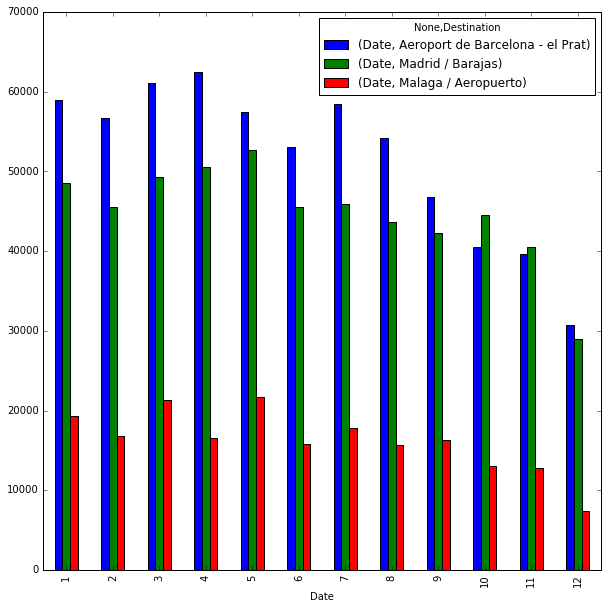

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
gb.unstack(level=0).plot(kind='bar', subplots=False, ax=ax)

In [22]:
del gb
del query

## 2. With pandas method only

In [23]:
chunksize = 200000
j = 1
index_start = 1

#chunk for data cleaning and keeps relevant columns with "AGP","MAD","BCN" aeroports, save all to a csv
for chunk in pd.read_csv('Data/searches.csv', chunksize=chunksize, iterator=True, encoding='utf-8', sep ='^'):
    chunk.index += index_start
    
    for col in chunk.columns:
        if chunk.dtypes[col].name == 'object':
            chunk[col] = chunk[col].map(lambda row:strip(row))
                      
    
    print(str(j)+'. chunk saved')
    
    if j == 1:
        chunk[chunk['Destination'].isin(["AGP","MAD","BCN"])][['Destination','Date']].to_csv('Data/SearchesExo3.csv', mode='w',index=False)
    else:
        chunk[chunk['Destination'].isin(["AGP","MAD","BCN"])][['Destination','Date']].to_csv('Data/SearchesExo3.csv', mode='a',index=False, header = None)
    
    index_start = chunk.index[-1] + 1
    j = j + 1
    
    del chunk

1. chunk saved
2. chunk saved
3. chunk saved
4. chunk saved
5. chunk saved
6. chunk saved
7. chunk saved
8. chunk saved
9. chunk saved
10. chunk saved
11. chunk saved
12. chunk saved
13. chunk saved
14. chunk saved
15. chunk saved
16. chunk saved
17. chunk saved
18. chunk saved
19. chunk saved
20. chunk saved
21. chunk saved
22. chunk saved
23. chunk saved
24. chunk saved
25. chunk saved
26. chunk saved
27. chunk saved
28. chunk saved
29. chunk saved
30. chunk saved
31. chunk saved
32. chunk saved
33. chunk saved
34. chunk saved
35. chunk saved
36. chunk saved
37. chunk saved
38. chunk saved
39. chunk saved
40. chunk saved
41. chunk saved
42. chunk saved
43. chunk saved
44. chunk saved
45. chunk saved
46. chunk saved
47. chunk saved
48. chunk saved
49. chunk saved
50. chunk saved
51. chunk saved
52. chunk saved
53. chunk saved
54. chunk saved
55. chunk saved
56. chunk saved
57. chunk saved
58. chunk saved
59. chunk saved
60. chunk saved
61. chunk saved
62. chunk saved
63. chunk saved
6

In [24]:
dfS3 = pd.read_csv("Data/SearchesExo3.csv") #load the new file created

In [25]:
dfS3['Date'] = pd.to_datetime(dfS3['Date']) #convert columns string date to object date format

In [26]:
np.unique(dfS3.Date.dt.year) #verify number of year

array([2013], dtype=int64)

In [27]:
geo_a = GeoBase(data='airports', verbose=False)
dfS3['Destination'] = dfS3['Destination'].map(lambda value: geo_a.get(value, 'name')) #matching between code airport and name 

In [28]:
gb = dfS3.groupby(['Destination', dfS3.Date.dt.month]).count() 

In [29]:
gb

Date
Destination                     Date       
Aeroport de Barcelona - el Prat 1     29469
                                2     28329
                                3     30552
                                4     31236
                                5     28728
                                6     26505
                                7     29241
                                8     27075
                                9     23427
                                10    20276
                                11    19824
                                12    15400
Madrid / Barajas                1     24258
                                2     22800
                                3     24681
                                4     25251
                                5     26334
                                6     22800
                                7     22971
                                8     21831
                                9     21147
                                10    22294
                                11    20272
                                12    14504
Malaga / Aeropuerto             1      9633
                                2      8379
                                3     10659
                                4      8265
                                5     10830
                                6      7923
                                7      8892
                                8      7866
                                9      8151
                                10     6499
                                11     6384
                                12     3696

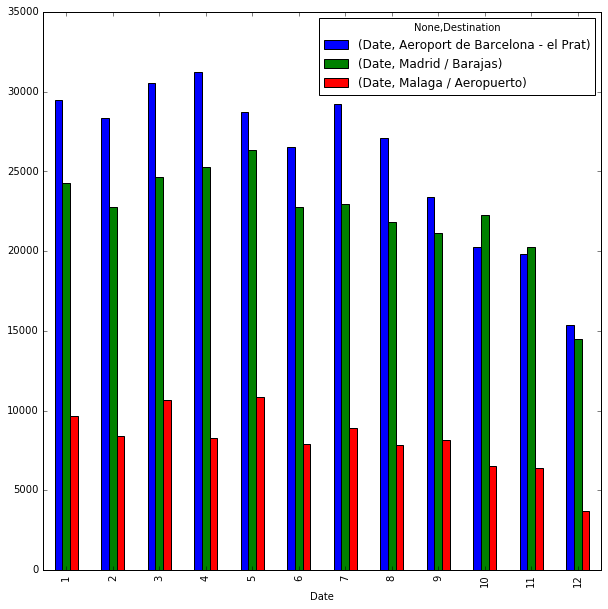

In [30]:
fig, ax = plt.subplots(figsize=(10,10))
gb.unstack(level=0).plot(kind='bar', subplots=False, ax=ax) #displays the plot

In [31]:
del gb
del dfS3

# Fourth exercise: match searches with bookings
For every search in the searches file, find out whether the search ended up in a booking or not (using the info in the bookings file). 

For instance, search and booking origin and destination should match. 

For the bookings file, origin and destination are the columns dep_port and arr_port, respectively. 

Generate a CSV file with the search data, and an additional field, containing 1 if the search ended up in a booking, and 0 otherwise.

Bonus point: Solving this problem using pandas (instead of any other approach)

In [3]:
#function to check all date value (one of them is just a number) and get just date format without time
def check(x):
    try:
        return datetime.strptime(x, '%Y-%m-%d %H:%M:%S').date()
    except ValueError: 
        return datetime(1970, 1, 1)

In [4]:
chunksize = 200000
j = 1
index_start = 1

#data cleaning and keep just columns needed from booking, save chunk to a csv file
for chunk in pd.read_csv('Data/bookings.csv', chunksize=chunksize, iterator=True, encoding='utf-8', sep ='^'):
    
    chunk = chunk.rename(columns={c: c.replace(' ', '') for c in chunk.columns}) # Remove spaces from columns
    
    chunk['brd_time'] = chunk['brd_time'].apply(check) #datetime format cleaning
    chunk = chunk[chunk['brd_time'] != datetime(1970,1,1)] #delete brd_time not correct values  
    
    for col in ['arr_port', 'dep_port', 'pos_oid']:
        if chunk.dtypes[col].name == 'object':
            chunk[col] = chunk[col].map(lambda row:strip(row)) #data cleaning
            
    if j == 1:
        chunk[['arr_port', 'dep_port','brd_time', 'pos_oid']].to_csv('Data/BookingsExo4.csv', mode='w',index=False)
    else:
        chunk[['arr_port', 'dep_port','brd_time','pos_oid']].to_csv('Data/BookingsExo4.csv', mode='a',index=False, header = None)
    
    print(str(j)+" chunk saving in BookingsExo4.csv")
    j=j+1
    
    del chunk

1 chunk saving in BookingsExo4.csv
2 chunk saving in BookingsExo4.csv
3 chunk saving in BookingsExo4.csv
4 chunk saving in BookingsExo4.csv
5 chunk saving in BookingsExo4.csv
6 chunk saving in BookingsExo4.csv
7 chunk saving in BookingsExo4.csv
8 chunk saving in BookingsExo4.csv
9 chunk saving in BookingsExo4.csv
10 chunk saving in BookingsExo4.csv
11 chunk saving in BookingsExo4.csv
12 chunk saving in BookingsExo4.csv
13 chunk saving in BookingsExo4.csv
14 chunk saving in BookingsExo4.csv
15 chunk saving in BookingsExo4.csv
16 chunk saving in BookingsExo4.csv
17 chunk saving in BookingsExo4.csv
18 chunk saving in BookingsExo4.csv
19 chunk saving in BookingsExo4.csv
20 chunk saving in BookingsExo4.csv
21 chunk saving in BookingsExo4.csv
22 chunk saving in BookingsExo4.csv
23 chunk saving in BookingsExo4.csv
24 chunk saving in BookingsExo4.csv
25 chunk saving in BookingsExo4.csv
26 chunk saving in BookingsExo4.csv
27 chunk saving in BookingsExo4.csv
28 chunk saving in BookingsExo4.csv
2

C:\Users\miou\Anaconda2\lib\site-packages\ipykernel\ipkernel.py:175: DtypeWarning: Columns (7,8,27) have mixed types. Specify dtype option on import or set low_memory=False.
  shell.run_cell(code, store_history=store_history, silent=silent)


In [5]:
chunksize = 200000
j = 1
index_start = 1

#data cleaning and keep just columns needed from searches, save chunk to a csv file
for chunk in pd.read_csv('Data/searches.csv', chunksize=chunksize, iterator=True, encoding='utf-8', sep ='^'):
    
    chunk['Seg1Date'] = pd.to_datetime(chunk['Seg1Date']).apply(lambda x: x.date())
    
    if j == 1:
        chunk[['Destination', 'Origin','Seg1Date', 'OfficeID']].to_csv('Data/SearchesExo4.csv', mode='w',index=False)
    else:
        chunk[['Destination', 'Origin','Seg1Date', 'OfficeID']].to_csv('Data/SearchesExo4.csv', mode='a',index=False, header = None)
        
    print(str(j)+" chunk saving in SearchesExo4.csv")
    j=j+1
    del chunk

1 chunk saving in SearchesExo4.csv
2 chunk saving in SearchesExo4.csv
3 chunk saving in SearchesExo4.csv
4 chunk saving in SearchesExo4.csv
5 chunk saving in SearchesExo4.csv
6 chunk saving in SearchesExo4.csv
7 chunk saving in SearchesExo4.csv

C:\Users\miou\Anaconda2\lib\site-packages\ipykernel\ipkernel.py:175: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  shell.run_cell(code, store_history=store_history, silent=silent)
C:\Users\miou\Anaconda2\lib\site-packages\ipykernel\ipkernel.py:175: DtypeWarning: Columns (40,41,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  shell.run_cell(code, store_history=store_history, silent=silent)



8 chunk saving in SearchesExo4.csv
9 chunk saving in SearchesExo4.csv
10 chunk saving in SearchesExo4.csv
11 chunk saving in SearchesExo4.csv
12 chunk saving in SearchesExo4.csv
13 chunk saving in SearchesExo4.csv
14 chunk saving in SearchesExo4.csv
15 chunk saving in SearchesExo4.csv
16 chunk saving in SearchesExo4.csv
17 chunk saving in SearchesExo4.csv
18 chunk saving in SearchesExo4.csv
19 chunk saving in SearchesExo4.csv
20 chunk saving in SearchesExo4.csv
21 chunk saving in SearchesExo4.csv
22 chunk saving in SearchesExo4.csv
23 chunk saving in SearchesExo4.csv
24 chunk saving in SearchesExo4.csv
25 chunk saving in SearchesExo4.csv
26 chunk saving in SearchesExo4.csv
27 chunk saving in SearchesExo4.csv
28 chunk saving in SearchesExo4.csv
29 chunk saving in SearchesExo4.csv
30 chunk saving in SearchesExo4.csv
31 chunk saving in SearchesExo4.csv
32 chunk saving in SearchesExo4.csv
33 chunk saving in SearchesExo4.csv
34 chunk saving in SearchesExo4.csv
35 chunk saving in SearchesEx

C:\Users\miou\Anaconda2\lib\site-packages\ipykernel\ipkernel.py:175: DtypeWarning: Columns (40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  shell.run_cell(code, store_history=store_history, silent=silent)


In [3]:
dfB4 = pd.read_csv('Data/BookingsExo4.csv') #loading bookings file with columns required for next merge 

In [7]:
chunksize = 200000
j = 1
index_start = 1

#chunk required because of the size's file, merging between searches and bookings files, if search ended up in booking then equals to 1 
for chunk in pd.read_csv('Data/SearchesExo4.csv', chunksize=chunksize, iterator=True, encoding='utf-8'):
    
    chunk.index += index_start
    chunk['booked'] = 0
    chunk['index_col'] = chunk.index #keep index from initial file to find searches ended up in a booking
    result = pd.merge(dfB4, chunk, right_on=['Seg1Date','Origin','Destination',"OfficeID"], left_on=['brd_time','dep_port','arr_port',"pos_oid"])
   
    for index, row in result.iterrows():
        chunk.loc[chunk["index_col"]==row["index_col"],'booked']=1 #result's row for index matching
    
    chunk.drop('index_col',axis=1, inplace=True) #index_col not needed anymore
    
    if j == 1:
        result.to_csv('Data/ResultExo4.csv', mode='w',index=False)
        chunk.to_csv('Data/AllSearchesResultsExo4.csv', mode='w',index=False)
    else:
        result.to_csv('Data/ResultExo4.csv', mode='a',index=False, header = None)
        chunk.to_csv('Data/AllSearchesResultsExo4.csv', mode='a',index=False,header = None)
    
    index_start = chunk.index[-1] + 1
    
    del result
    del chunk
    
    print(str(j)+" chunk and results saving in ResultExo4.csv and AllSearchesResultsExo4.csv respectively")
    
    j=j+1

1 chunk and results saving in ResultExo4.csv and AllSearchesResultsExo4.csv respectively
2 chunk and results saving in ResultExo4.csv and AllSearchesResultsExo4.csv respectively
3 chunk and results saving in ResultExo4.csv and AllSearchesResultsExo4.csv respectively
4 chunk and results saving in ResultExo4.csv and AllSearchesResultsExo4.csv respectively
5 chunk and results saving in ResultExo4.csv and AllSearchesResultsExo4.csv respectively
6 chunk and results saving in ResultExo4.csv and AllSearchesResultsExo4.csv respectively
7 chunk and results saving in ResultExo4.csv and AllSearchesResultsExo4.csv respectively
8 chunk and results saving in ResultExo4.csv and AllSearchesResultsExo4.csv respectively
9 chunk and results saving in ResultExo4.csv and AllSearchesResultsExo4.csv respectively
10 chunk and results saving in ResultExo4.csv and AllSearchesResultsExo4.csv respectively
11 chunk and results saving in ResultExo4.csv and AllSearchesResultsExo4.csv respectively
12 chunk and result

In [8]:
result = pd.read_csv("Data/ResultExo4.csv") #display searches ended on a booking

In [9]:
result

,arr_port,dep_port,brd_time,pos_oid,Destination,Origin,Seg1Date,OfficeID,booked,index_col
0,FRA,HAM,2013-03-20,b0914bf85a8c69e6ad1816675ba871cc,FRA,HAM,2013-03-20,b0914bf85a8c69e6ad1816675ba871cc,0,70953
1,FRA,HAM,2013-03-20,b0914bf85a8c69e6ad1816675ba871cc,FRA,HAM,2013-03-20,b0914bf85a8c69e6ad1816675ba871cc,0,70953
2,FRA,HAM,2013-03-20,b0914bf85a8c69e6ad1816675ba871cc,FRA,HAM,2013-03-20,b0914bf85a8c69e6ad1816675ba871cc,0,70953
3,FRA,HAM,2013-03-20,b0914bf85a8c69e6ad1816675ba871cc,FRA,HAM,2013-03-20,b0914bf85a8c69e6ad1816675ba871cc,0,70953
4,FRA,HAM,2013-03-20,b0914bf85a8c69e6ad1816675ba871cc,FRA,HAM,2013-03-20,b0914bf85a8c69e6ad1816675ba871cc,0,70953
5,FRA,HAM,2013-03-20,b0914bf85a8c69e6ad1816675ba871cc,FRA,HAM,2013-03-20,b0914bf85a8c69e6ad1816675ba871cc,0,70953
6,FRA,HAM,2013-03-20,b0914bf85a8c69e6ad1816675ba871cc,FRA,HAM,2013-03-20,b0914bf85a8c69e6ad1816675ba871cc,0,70953
7,FRA,HAM,2013-03-20,b0914bf85a8c69e6ad1816675ba871cc,FRA,HAM,2013-03-20,b0914bf85a8c69e6ad1816675ba871cc,0,70953
8,FRA,HAM,2013-03-20,b0914bf85a8c69e6ad1816675ba871cc,FRA,HAM,2013-03-20,b0914bf85a8c69e6ad1816675ba871cc,0,70953
9,FRA,HAM,2013-03-20,b0914bf85a8c69e6ad1816675ba871cc,FRA,HAM,2013-03-20,b0914bf85a8c69e6ad1816675ba871cc,0,70953


# Bonus exercise: write a Web Service

Wrap the output of the second exercise in a web service that returns the data in JSON format (instead of printing to the standard output). The web service should accept a parameter n>0. For the top 10 airports, n is 10. For the X top airports, n is X.

In [ ]:
df_ws = pd.read_sql_query('SELECT arr_port, sum(pax) as `sum`'
                       'FROM bookings '
                       'GROUP BY arr_port ', disk_engine)

In [ ]:
all_arr = df_ws.sort_values('sum',ascending = False)

In [ ]:
def get_city(code):
    try:
        return geo_a.get(code,"name")
    except KeyError:
        return ""
    
geo_a = GeoBase(data='airports', verbose=False)
all_arr['arr_city'] = all_arr['arr_port'].map(get_city)

In [ ]:
from bottle import route, run

@route('/DataChallenge/<n>')
def index(n):
    return all_arr[:int(n)].to_json(orient='records')

run(host='localhost', port=8080)